In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True) #na_values='?' specifies a character or a list of characters to be treated as NaN (Not a Number).
                                                          #In this case, the question mark '?' is treated as a missing value.
                                                          #sep=' ' is a delimiter
                                                          #skipinitialspace=True skips the initial blank space

In [ ]:
dataset = raw_dataset.copy()  #Copying into the dataset
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum()  #Finds the number of missing values using boolean expressions and returns the total number of missing values

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna() # drops rows with missing values

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})  #the 'Origin' column in the dataset DataFrame will be updated, and numerical values will be replaced with their corresponding categorical labels.

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='') #Performs a one-hot encoding on the basis of the country to provide the numerical data to the model
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0) #Splitting of Data into training and testing, train consists of randomly sampled 80% Data
test_dataset = dataset.drop(train_dataset.index)  #Consist of the remaining data, drop removes the data contained in the training set, thus it has 20% of the leftover data

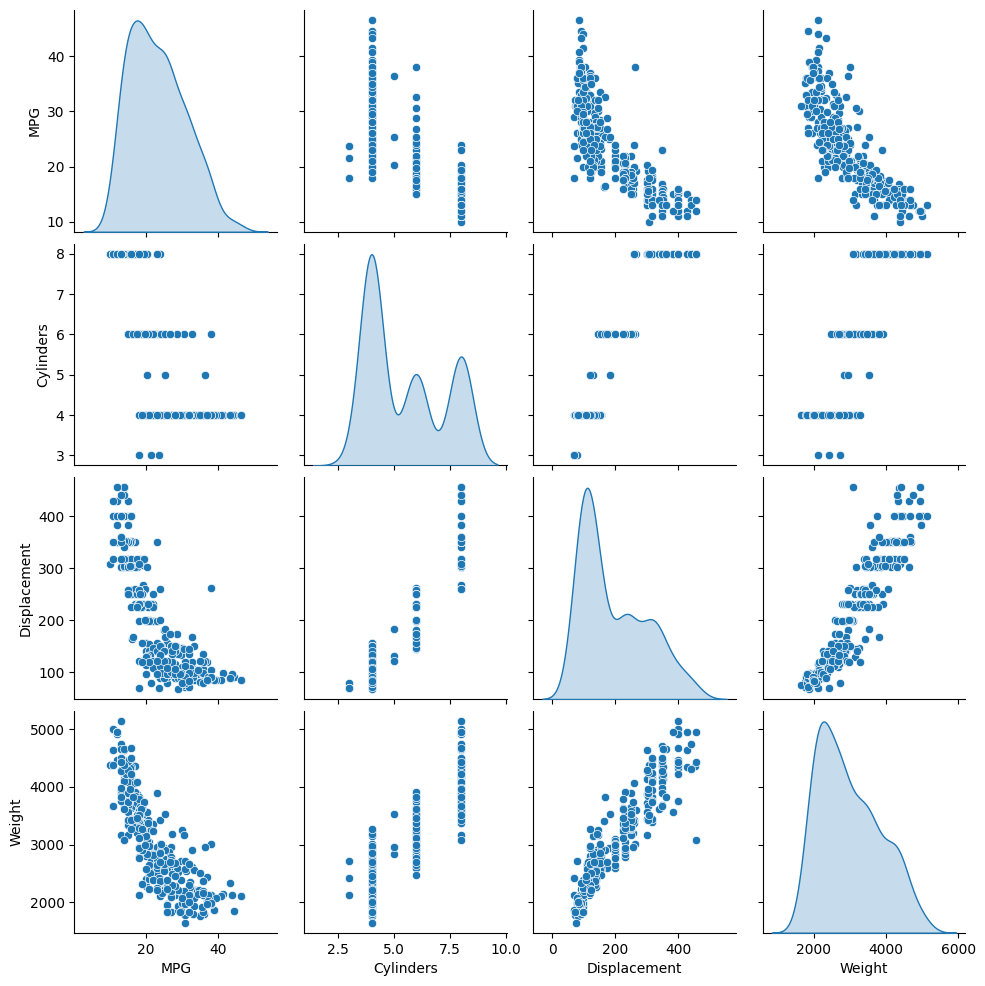

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')# Creates a matrix of plots of the selected subset  of columns and specifies that the diagonal plots must be Kernel Density Estimations

In [ ]:
train_dataset.describe().transpose() #is used to generate a summary statistics table for the numerical columns in the training dataset

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')



In [ ]:
train_dataset.describe().transpose()[['mean', 'std']] #The ranges for values are different, thus we need normalization

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)#performs feature-wise normalization. It normalizes each feature independently based on the statistics (mean and variance) computed during training
                                                    #-1 indicates the last axis,the axis corresponding to the features in the input data.



In [ ]:
normalizer.adapt(np.array(train_features))# The adapt method is used to compute and set the normalization parameters (mean and variance) based on the training data.
                                          # In this case, we are adapting the normalization to the features in your training dataset
                                          #The Normalization layer, when adapted, computes the mean and variance of each feature in the training data.
                                          #These computed statistics are then used during inference to normalize new data in the same way.

In [ ]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [ ]:
horsepower = np.array(train_features['Horsepower'])   #Start of the linear regression to predict MPG from Horsepower

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [ ]:
horsepower_model = tf.keras.Sequential([    #This is a keras sequential model for the regression
    horsepower_normalizer,                  #Feature-wise normalisation
    layers.Dense(units=1)                   #This is a dense (fully connected) layer with a single unit. It is a simple linear regression layer that outputs a single value, which is the predicted 'MPG'.
])

horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
horsepower_model.predict(horsepower[:10]) #prediction for first 10 examples

1/1 [==============================] - 0s 112ms/step


array([[27.558],
       [25.387],
       [13.366],
       [29.561],
       [28.893],
       [25.053],
       [30.062],
       [28.893],
       [24.218],
       [25.387]], dtype=float32)

In [ ]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),  #used to compile with specific optimizers and loss func
    loss='mean_absolute_error')

In [ ]:
%%time
history = horsepower_model.fit(           #%%time is a magic func giving the time of execution
    #history stores information about the training process, such as the training and validation loss for each epoch.
  train_features['Horsepower'],

    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

#This method trains the model using the specified features ('Horsepower') and target labels (train_labels). It runs for 100 epochs with no logging (verbose=0),
#and validation results are calculated on 20% of the training data (validation_split=0.2).


CPU times: user 4.79 s, sys: 178 ms, total: 4.97 s
Wall time: 5.46 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.802903,4.193018,95
96,3.802994,4.199452,96
97,3.803440,4.180975,97
98,3.803941,4.188945,98
99,3.806398,4.203446,99


In [ ]:
def plot_loss(history):                         #Defines Plotting parameters
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

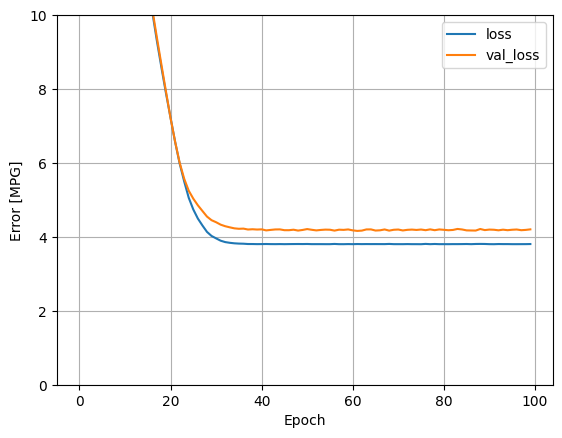

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}#stores test results for later

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)


8/8 [==============================] - 0s 8ms/step


In [ ]:
def plot_horsepower(x, y):    #To view model's prediction as a function of input
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

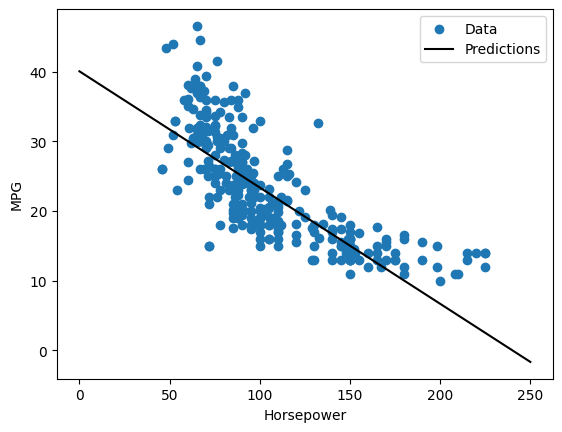

In [ ]:
plot_horsepower(x, y)

Linear Regression with Multiple inputs

This still uses $y=mx+b$ except $m$ is a matrix and $x$ is a vector.

In [ ]:
linear_model = tf.keras.Sequential([    # Creating a Linear Model with a normalizer and a final single unit dense layer
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10]) #Prediction for first 10 samples


1/1 [==============================] - 0s 191ms/step


array([[-1.175],
       [ 0.08 ],
       [-0.251],
       [-0.272],
       [ 0.847],
       [ 0.021],
       [ 0.865],
       [ 1.078],
       [-0.628],
       [ 0.417]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel #Accesses the dense layer and the .kernel gives the weights of the connected neurons


<tf.Variable 'dense_2/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.253],
       [ 0.49 ],
       [ 0.59 ],
       [-0.227],
       [ 0.404],
       [ 0.454],
       [ 0.104],
       [ 0.209],
       [-0.166]], dtype=float32)>

In [ ]:
linear_model.compile(                                   #Compiled with the optimizers and loss func
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.95 s, sys: 206 ms, total: 6.16 s
Wall time: 9.29 s


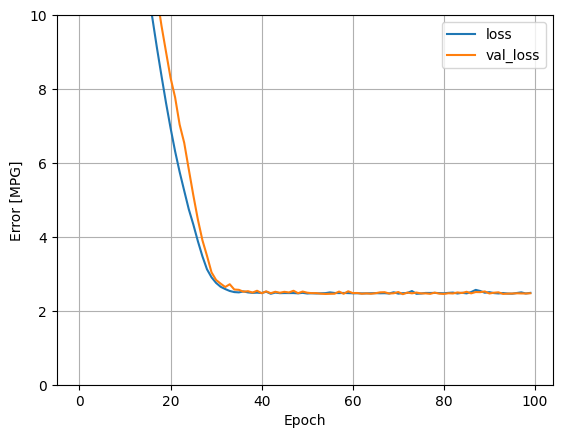

In [ ]:
plot_loss(history)


In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)      #Evaluates performance of teh trained linear model

Linear Regression with Deep Neural Networks(DNNs)

In [ ]:
def build_and_compile_model(norm):                #Combines build and compile
  model = keras.Sequential([                      #Has 3 layers, 64,64 and 1, all interconnected due to relu
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [ ]:
dnn_horsepower_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.35 s, sys: 222 ms, total: 6.57 s
Wall time: 7.1 s


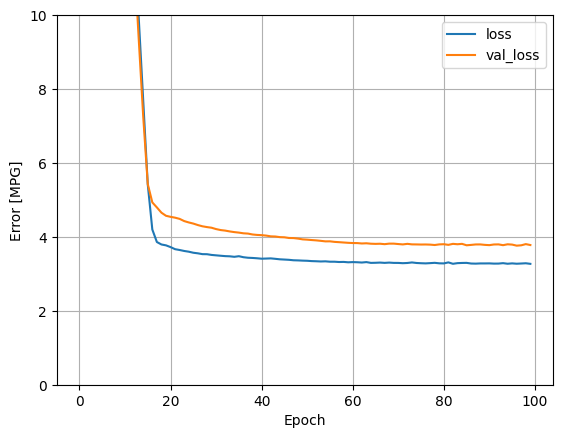

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 3ms/step


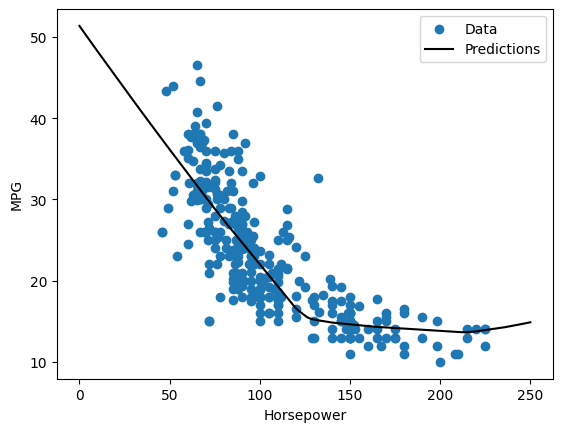

In [ ]:
plot_horsepower(x, y)

In [ ]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(         #Store
    test_features['Horsepower'], test_labels,
    verbose=0)

Now we take in multiple inputs for the DNN

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 9)                 19        
 on)                                                             
                                                                 
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 5.78 s, sys: 197 ms, total: 5.98 s
Wall time: 11 s


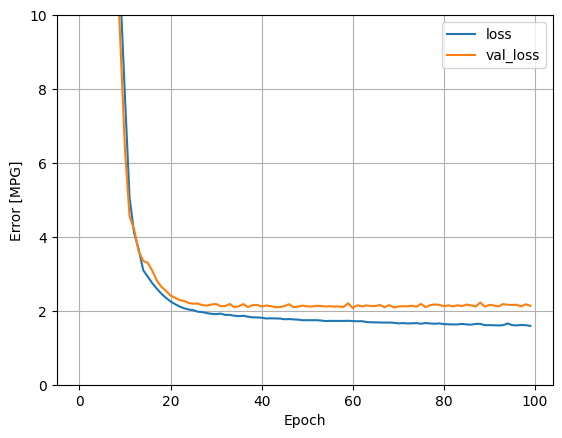

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

Performance comparision

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.650202
linear_model,2.449858
dnn_horsepower_model,2.944335
dnn_model,1.672442


3/3 [==============================] - 0s 5ms/step


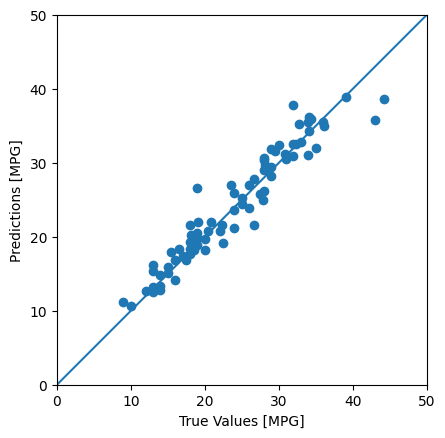

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

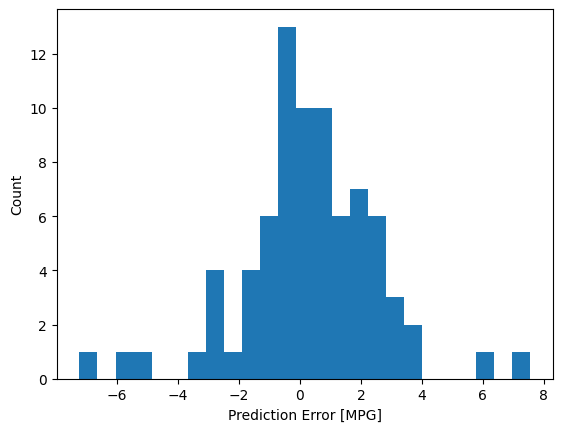

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model.keras')   #To save the model

I am planning to make a simple Stock price predictor using regression and the Google Stock Price Data